In [22]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [23]:
# !pip install tensorflow

In [24]:
# from google.colab import drive
# drive.mount('/content/drive')

In [25]:
BATCH_SIZE = 32
IMAGE_SIZE = 128
CHANNELS = 3
EPOCHS = 50

In [26]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "C:/Users/Hp/Downloads/New folder (2)/PlantVillage",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 16011 files belonging to 10 classes.


In [27]:
class_names = dataset.class_names

class_names

['Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

In [28]:
# for image_batch, labels_batch  in dataset.take(1):
#     print(image_batch.shape)
#     print(labels_batch.numpy())
#     for u in range(12):
#         ax = plt.subplot(3,4,u+1)
#         plt.imshow(image_batch[u].numpy().astype("uint8"))
#         plt.axis("off")

In [29]:
train_size = 0.8
len(dataset)*train_size

400.8

In [30]:
train_ds = dataset.take(400)
len(train_ds)

400

In [31]:
test_ds = dataset.skip(400)
len(test_ds)

101

In [32]:
val_size = 0.1
len(dataset)*val_size

50.1

In [33]:
val_ds = test_ds.take(50)
len(val_ds)

50

In [34]:
test_ds = test_ds.skip(50)
len(test_ds)

51

In [14]:
def get_dataset_partition_tf(ds, train_spilt = 0.8, val_spilt = 0.1, test_spilt = 0.1, shuffle =True, shuffle_size= 10000 ):
    assert(train_spilt+test_spilt+val_spilt) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed = 12)
    
    train_size = int(train_spilt*ds_size)
    val_size = int(val_spilt*ds_size)
    
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [15]:
train_ds, val_ds, test_ds = get_dataset_partition_tf(dataset)

In [16]:
len(train_ds)

400

In [17]:
len(test_ds)

51

In [18]:
train_ds = train_ds.cache().shuffle(10000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(10000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(10000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [19]:
# for image_batch, labels_batch in dataset.take(1):
#     print(image_batch[0].numpy()/255)


[[[0.6578431  0.65392154 0.67745095]
  [0.6637255  0.6598039  0.68333334]
  [0.6696078  0.66568625 0.68921566]
  ...
  [0.65686274 0.65294117 0.6764706 ]
  [0.6666667  0.6627451  0.6862745 ]
  [0.68039215 0.6764706  0.7       ]]

 [[0.6764706  0.672549   0.6960784 ]
  [0.67156863 0.66764706 0.6911765 ]
  [0.6637255  0.6598039  0.68333334]
  ...
  [0.6607843  0.65686274 0.68039215]
  [0.66568625 0.6617647  0.6852941 ]
  [0.67058825 0.6666667  0.6901961 ]]

 [[0.68333334 0.67941177 0.7029412 ]
  [0.6784314  0.6745098  0.69803923]
  [0.672549   0.66862744 0.69215685]
  ...
  [0.65294117 0.6490196  0.672549  ]
  [0.6480392  0.64411765 0.66764706]
  [0.6431373  0.6392157  0.6627451 ]]

 ...

 [[0.44215685 0.41862744 0.42647058]
  [0.45392156 0.43039215 0.43823528]
  [0.44019607 0.41666666 0.4245098 ]
  ...
  [0.43823528 0.41862744 0.4343137 ]
  [0.44607842 0.42647058 0.44215685]
  [0.45       0.43039215 0.44607842]]

 [[0.43039215 0.40686274 0.41470587]
  [0.4372549  0.4137255  0.42156863]


In [20]:
resizeandrescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [21]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [22]:
input_shape = (BATCH_SIZE ,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
input_shape

(32, 128, 128, 3)

In [23]:
# !pip install -q keras-tcn
# from tcn import TCN

In [24]:
input_shape = (BATCH_SIZE ,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes = 10

# model = models.Sequential([
#     resizeandrescale,
#     data_augmentation,
#     layers.Conv2D(32, (5,5), padding='same', activation='relu', input_shape=input_shape),
#     layers.MaxPooling2D((2,2)),
#     layers.Conv2D(32, (5,5), padding='same', activation='relu'),
#     layers.MaxPool2D((2,2)),
#     layers.Dropout(0.25),
#     layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
#     layers.MaxPooling2D((2,2)),
#     layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
#     layers.MaxPooling2D((2,2)),
#     layers.Conv2D(64, (3,3), activation='relu'),
#     layers.MaxPooling2D((2,2)),
#     layers.MaxPool2D(strides=(2,2)),
#     layers.Dropout(0.25),
#     layers.Flatten(),
#     layers.Dense(128, activation='relu'),
#     layers.Dropout(0.5),
#     layers.Dense(n_classes, activation='softmax')
# ])


# '''codebasics'''
model = models.Sequential([
    resizeandrescale,
    data_augmentation,
    layers.Conv2D(32, kernel_size=(5,5), activation='relu', input_shape= input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(5,5), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    # layers.Conv2D(256, (3,3), activation='relu'),
    # layers.MaxPooling2D((2,2)),
    # layers.Conv2D(64, (3,3), activation='relu'),
    # layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
])

# model = models.Sequential()
# model.add(layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape= input_shape))
# model.add(layers.MaxPooling2D((2,2)))
# model.add(layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
# model.add(layers.MaxPooling2D((2,2)))
# model.add(layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
# model.add(layers.MaxPooling2D((2,2)))
# model.add(layers.Conv2D(64, (3,3), activation='relu'))
# model.add(layers.MaxPooling2D((2,2)))
# model.add(layers.Conv2D(64, (3,3), activation='relu'))
# model.add(layers.MaxPooling2D((2,2)))
# model.add(layers.Conv2D(64, (3,3), activation='relu'))

# model.add(layers.Flatten())
# model.add(layers.Dense(64, activation='relu'))
# model.add(layers.Dense(n_classes, activation='softmax'))

# '''TCN M'''
# model = models.Sequential([
#     resizeandrescale,
#     data_augmentation,
#     TCN(32, kernel_size=(5,5), activation='relu', input_shape= input_shape),
#     layers.MaxPooling2D((2,2)),
#     TCN(64, kernel_size=(5,5), activation='relu'),
#     layers.MaxPooling2D((2,2)),
#     TCN(128, kernel_size=(3,3), activation='relu'),
#     layers.MaxPooling2D((2,2)),
#     TCN(256, (3,3), activation='relu'),
#     # layers.MaxPooling2D((2,2)),
#     # layers.Conv2D(64, (3,3), activation='relu'),
#     layers.MaxPooling2D((2,2)),
#     TCN(128, (3,3), activation='relu'),
#     layers.Flatten(),
#     layers.Dense(64, activation='relu'),
#     layers.Dense(n_classes, activation='softmax')
# ])

model.build(input_shape=input_shape)

In [25]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 128, 128, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 128, 128, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 124, 124, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2D  (32, 62, 62, 32)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 58, 58, 64)          51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 29, 29, 64)         0         
 2D)                                                  

In [ ]:
# '''Kaggle mnist dataset with 99.5%'''
# model.compile(optimizer=tf.keras.optimizers.RMSprop(epsilon=1e-08), loss='categorical_crossentropy', metrics=['acc'])

with tf.device('/GPU:0'):
  model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics= ['accuracy']
)

In [ ]:
with tf.device('/GPU:0'):
  history= model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=EPOCHS
)

Epoch 1/50
400/400 [==============================] - 18s 46ms/step - loss: 0.0921 - accuracy: 0.9685 - val_loss: 0.0652 - val_accuracy: 0.9787
Epoch 2/50
400/400 [==============================] - 19s 46ms/step - loss: 0.0858 - accuracy: 0.9685 - val_loss: 0.1121 - val_accuracy: 0.9694
Epoch 3/50
400/400 [==============================] - 19s 46ms/step - loss: 0.0900 - accuracy: 0.9694 - val_loss: 0.0806 - val_accuracy: 0.9737
Epoch 4/50
400/400 [==============================] - 18s 46ms/step - loss: 0.0886 - accuracy: 0.9712 - val_loss: 0.1030 - val_accuracy: 0.9613
Epoch 5/50
400/400 [==============================] - 19s 46ms/step - loss: 0.0781 - accuracy: 0.9746 - val_loss: 0.2174 - val_accuracy: 0.9400
Epoch 6/50
400/400 [==============================] - 18s 46ms/step - loss: 0.0988 - accuracy: 0.9678 - val_loss: 0.0919 - val_accuracy: 0.9694
Epoch 7/50
400/400 [==============================] - 19s 47ms/step - loss: 0.0768 - accuracy: 0.9807 - val_loss: 0.1080 - val_accuracy:

In [ ]:
score= model.evaluate(test_ds)

51/51 [==============================] - 21s 12ms/step - loss: 0.0410 - accuracy: 0.9835


In [ ]:
# model.save('/content/drive/MyDrive/Colab Notebooks/PlantVillage/my_mode_9806.h5')

In [ ]:
# history

In [35]:
from tensorflow.keras.models import load_model

In [36]:
model = load_model('C:/Users/Hp/Downloads/New folder (2)/my_mode_9806.h5')

In [37]:
# '''Kaggle mnist dataset with 99.5%'''
# model.compile(optimizer=tf.keras.optimizers.RMSprop(epsilon=1e-08), loss='categorical_crossentropy', metrics=['acc'])

with tf.device('/GPU:0'):
  model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics= ['accuracy']
)

first image to predict
actual label: Tomato__Tomato_YellowLeaf__Curl_Virus
1/1 [==============================] - 1s 678ms/step
predicted label: Tomato__Tomato_YellowLeaf__Curl_Virus


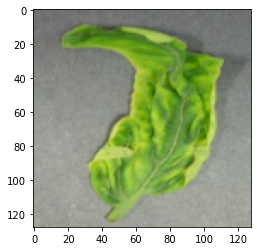

In [38]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])


In [41]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 58ms/step


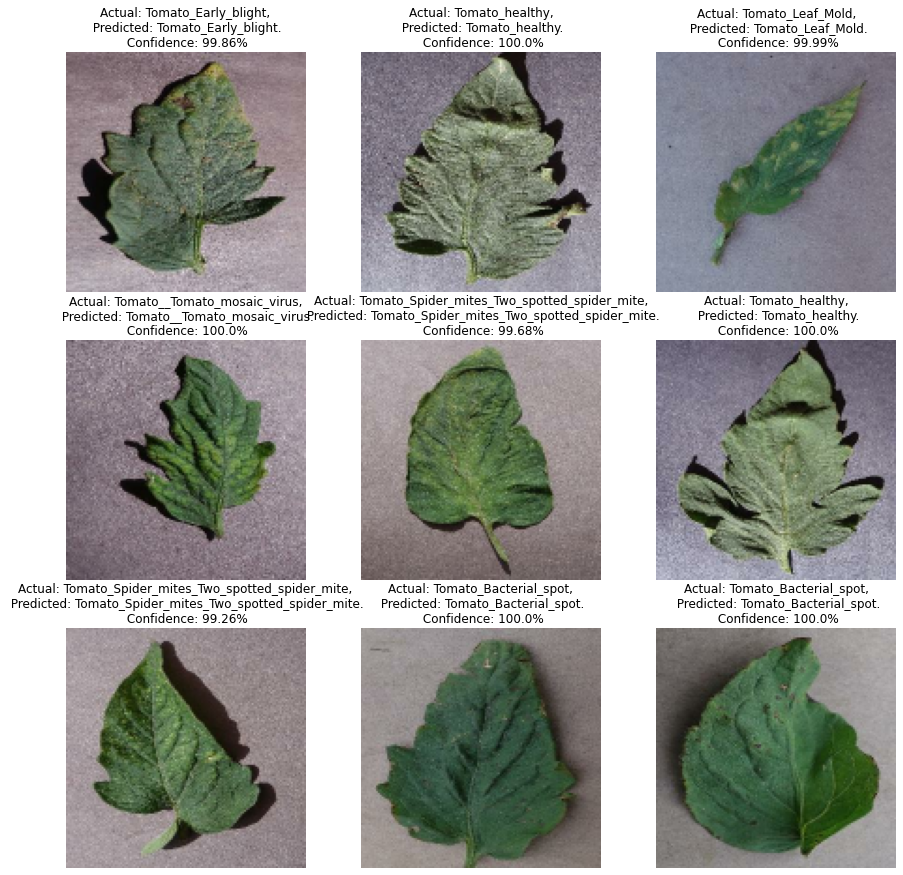

In [42]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")